In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Datasets:
Kaggle - https://www.kaggle.com/datasets/ruthgn/beer-profile-and-ratings-data-set <br>
Open Beer Database - https://public.opendatasoft.com/explore/dataset/open-beer-database-breweries/export/?disjunctive.state&disjunctive.country <br>

In [2]:
beer_prof = pd.read_csv(r'C:\Users\Anja Wittler\OneDrive\Dokumente\TG\WBS\bootcamp\project\data\beer\data\beer_profile_and_ratings_v5.csv')

## The main data set (beer_profile_and_ratings.csv) contains the following columns:

1 - Name: Beer name (label) <br>
2 - Style: Beer Style <br>
3 - Brewery: Brewery name <br>
4 - Beer Name (Full): Complete beer name (Brewery + Brew Name) -- unique identifier for each beer <br>
5 - Description: Notes on the beer if available <br>
6 - ABV: Alcohol content of beer (% by volume) <br>
7 - Min IBU: The minimum IBU value each beer can possess. IBU was not a value available for each beer, but the IBU range for each style was <br>
8 - Max IBU: The maximum IBU value each beer can possess. IBU was not a value available for each beer, but the IBU range for each style was <br>

The next eleven columns represent the tasting profile features of the beer, and are defined by word counts found in up to 25 reviews of each beer. The assumption is that people <br> writing reviews are more than likely describing what they do experience rather than what they do not. (Refer to the file Beer Descriptors Simplified to see the list of words <br> that are used to calculate the values contained in each of the feature columns below) <br>
<br>
(Mouthfeel) <br>
9 - Astringency <br>
10 - Body <br>
11 - Alcohol <br>

(Taste) <br>
12 - Bitter <br>
13 - Sweet <br>
14 - Sour <br>
15 - Salty <br>

(Flavor And Aroma) <br>
16 - Fruits <br>
17 - Hoppy <br>
18 - Spices <br>
19 - Malty <br>

The last six columns contain information from beer reviews--they include the number (count) of consumer/user reviews, the average overall rating score, and the average rating  <br> scores for the aroma, appearance, palate, and taste of each individual beer. <br>

20 - review _ aroma <br>
21 - review _ appearance <br>
22 - review _ palate <br>
23 - review _ taste <br>
24 - review _ overall <br>
25 - number _ of _ reviews <br>

The next two files (Brewery Name Fuzzy Match List.csv and Beer Name Fuzzy Match List.csv) only contain lists of breweries and beers that are found in both source datasets--and  <br> consequently, included in this dataset. To see the data integration process in more details, check out this notebook. <br>

The last file (Beer Descriptors Simplified) contains list of words that are used to calculate the values contained in the tasting profile feature columns. <br>

https://www.kaggle.com/datasets/ruthgn/beer-profile-and-ratings-data-set

IBU is an abbreviation for the International Bitterness Units scale, a gauge of beer's bitterness. What IBUs measure are the parts per million of isohumulone found in a beer. <br>
The rate of bittering is an important influence on taste as the success in the marketplace of the Dogfish Head brand's 60 Minute IPA and 90 Minute IPA has demonstrated. But an IBU <br> scale is more accurate for measuring bitterness than any method based on the rate of hops addition.

IBU is an abbreviation for the International Bitterness Units scale, a gauge of beer's bitterness. What IBUs measure are the parts per million of isohumulone found in a beer. <br>

Isohumulone is the acid found in hops that gives beer its bitter bite.  Though the IBU scale can be used as a general guideline for taste, with lower IBUs corresponding to less  <br> bitterness and vice versa, it's important to note that malt and other flavors can mask the taste of bitterness in beer. <br>

https://beerconnoisseur.com/articles/whats-meaning-ibu

In [4]:
beer_prof.shape

(3197, 25)

In [8]:
beer_prof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Style_red          3197 non-null   object
 1   Brewery            3197 non-null   object
 2   Beer Name (Full)   3197 non-null   object
 3   Description        3197 non-null   object
 4   ABV                3197 non-null   int64 
 5   Min IBU            3197 non-null   int64 
 6   Max IBU            3197 non-null   int64 
 7   Astringency        3197 non-null   int64 
 8   Body               3197 non-null   int64 
 9   Alcohol            3197 non-null   int64 
 10  Bitter             3197 non-null   int64 
 11  Sweet              3197 non-null   int64 
 12  Sour               3197 non-null   int64 
 13  Salty              3197 non-null   int64 
 14  Fruits             3197 non-null   int64 
 15  Hoppy              3197 non-null   int64 
 16  Spices             3197 non-null   int64 


### check for missing values

In [10]:
beer_prof.isnull().sum()

Style_red            0
Brewery              0
Beer Name (Full)     0
Description          0
ABV                  0
Min IBU              0
Max IBU              0
Astringency          0
Body                 0
Alcohol              0
Bitter               0
Sweet                0
Sour                 0
Salty                0
Fruits               0
Hoppy                0
Spices               0
Malty                0
review_aroma         0
review_appearance    0
review_palate        0
review_taste         0
review_overall       0
number_of_reviews    0
country              0
dtype: int64

In [13]:
beer_prof.rename(columns={'country':'Country'}, inplace=True)

### check for duplicates

In [14]:
beer_prof.duplicated().sum()

0

## Correlation of 'mouthfeel', 'taste' and 'flavor' with country

In [17]:
# reduce df for correlation with country

beer_corr_country = beer_prof.drop(['Style_red', 'Brewery', 'Description'], axis=1).copy()

In [18]:
beer_mouth_country = beer_corr_country.filter(['Astringency', 'Body', 'Alcohol', 'Country']).copy()

### Bar plots with Matplotlib

In [19]:
beer_mouth_country_plot = pd.melt(beer_mouth_country, id_vars=['Country'], value_vars=['Astringency', 'Body', 'Alcohol']).copy()

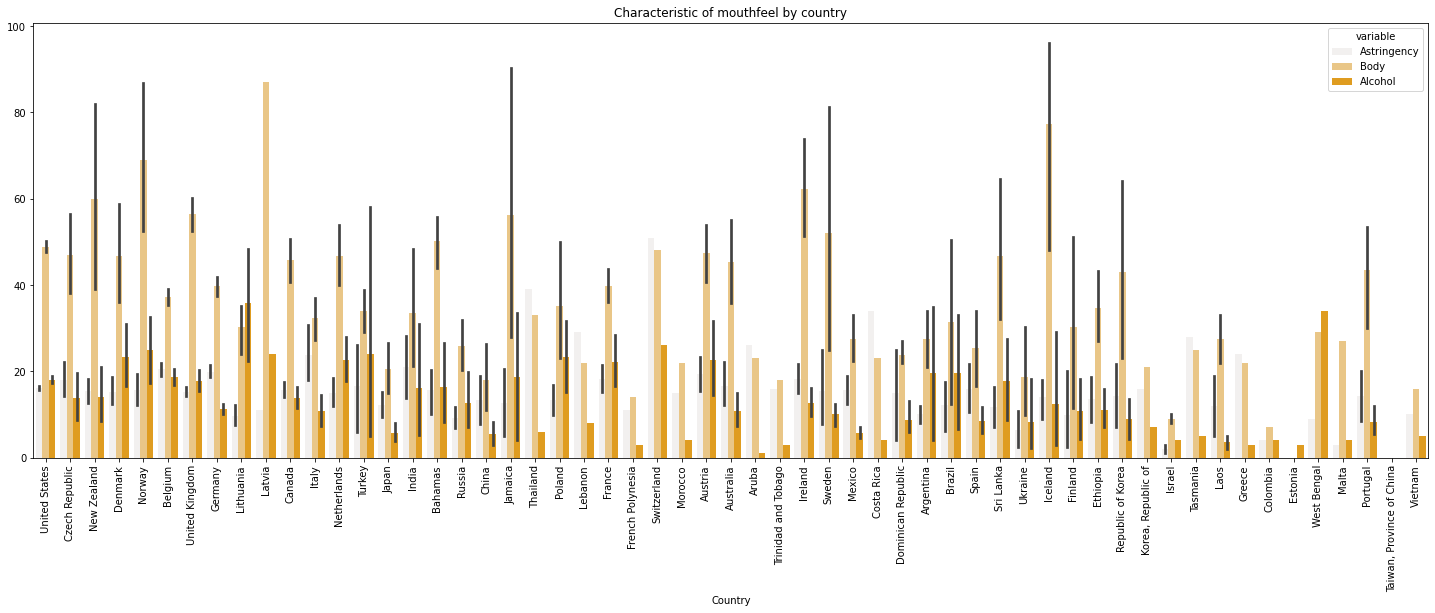

In [56]:
plt.subplots(figsize=(25, 8))


p = sns.barplot(
    data=beer_mouth_country_plot, 
    x='Country', 
    y='value', 
    hue='variable', 
    color='orange',
    
)

plt.xlabel('Country') 
plt.ylabel('') 
plt.title('Characteristic of mouthfeel by country')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y') 
plt.show() 

In [22]:
beer_taste_country = beer_corr_country.filter(['Bitter', 'Sweet', 'Sour', 'Salty', 'Country']).copy()

In [23]:
beer_taste_country_plot = pd.melt(beer_taste_country, id_vars=['Country'], value_vars=['Bitter', 'Sweet', 'Sour', 'Salty']).copy()

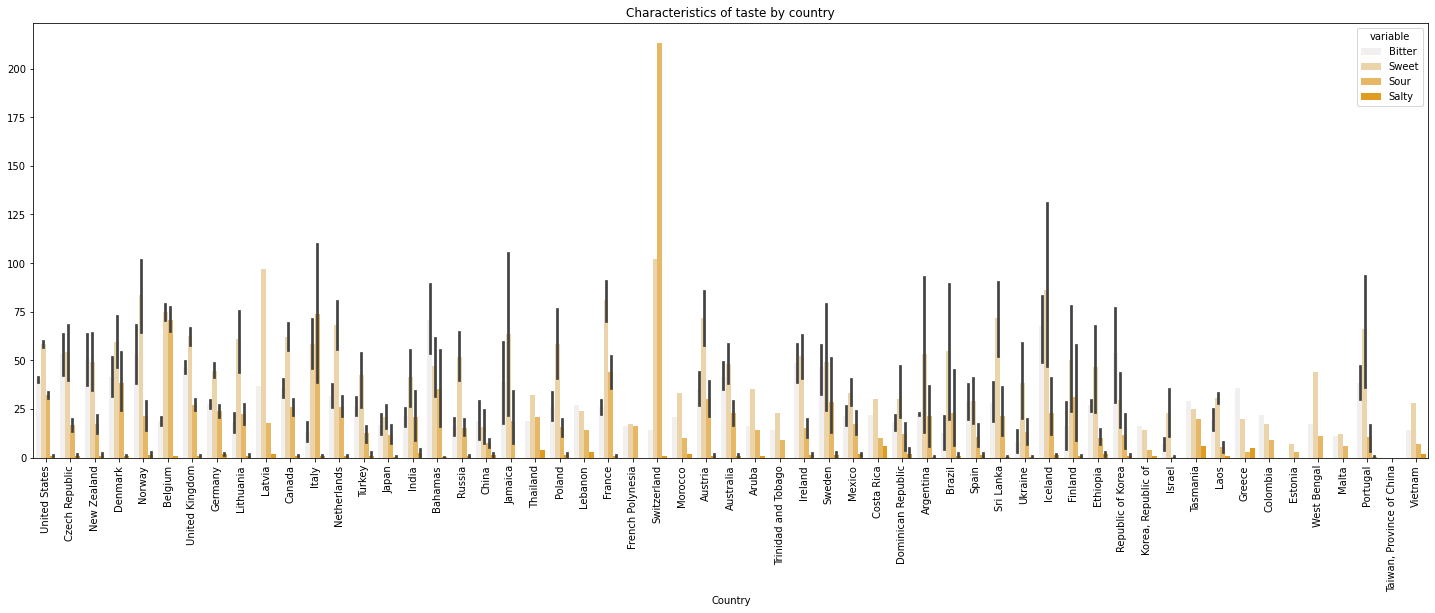

In [55]:
plt.subplots(figsize=(25, 8))


p = sns.barplot(
    data = beer_taste_country_plot, 
    x='Country', 
    y='value', 
    hue='variable', 
    color='orange',
    
)

plt.xlabel('Country') 
plt.ylabel('') 
plt.title('Characteristics of taste by country')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y') 
plt.show() 

In [29]:
beer_flavor_country = beer_corr_country.filter(['Fruits', 'Hoppy', 'Spices', 'Malty', 'Country']).copy()

In [30]:
beer_flavor_country_plot = pd.melt(beer_flavor_country, id_vars=['Country'], value_vars=['Fruits', 'Hoppy', 'Spices', 'Malty']).copy()

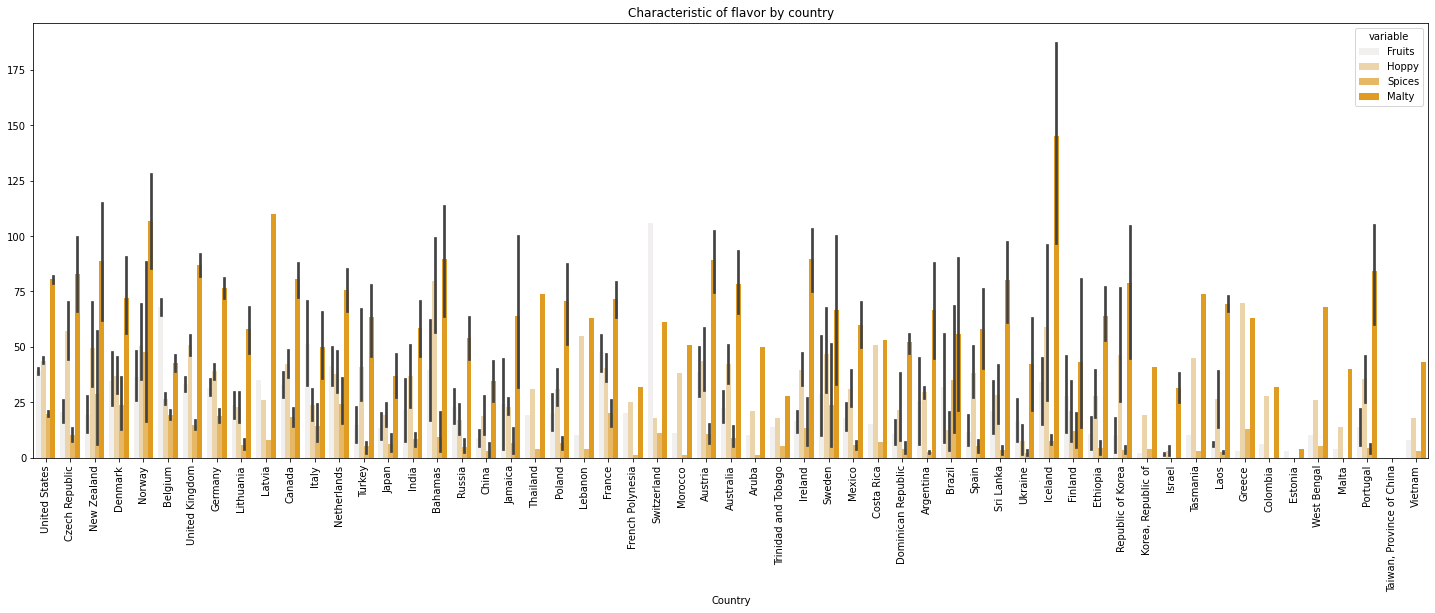

In [54]:
plt.subplots(figsize=(25, 8))


p = sns.barplot(
    data=beer_flavor_country_plot, 
    x='Country', 
    y='value', 
    hue='variable', 
    color='orange',
    
)

plt.xlabel('Country') 
plt.ylabel('') 
plt.title('Characteristic of flavor by country')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y') 
plt.show() 

In [33]:
beer_mouth_country.to_csv(r'C:\Users\Anja Wittler\OneDrive\Dokumente\TG\WBS\bootcamp\project\data\beer\data\beer_mouth_country.csv')

In [34]:
beer_taste_country.to_csv(r'C:\Users\Anja Wittler\OneDrive\Dokumente\TG\WBS\bootcamp\project\data\beer\data\beer_taste_country.csv')

In [35]:
beer_flavor_country.to_csv(r'C:\Users\Anja Wittler\OneDrive\Dokumente\TG\WBS\bootcamp\project\data\beer\data\beer_flavor_country.csv')

## Correlation of 'mouthfeel', 'taste' and 'flavor' with style

In [36]:
# reduce df for correlation with style

beer_corr_style = beer_prof.drop(['Country', 'Brewery', 'Description'], axis=1).copy()

In [39]:
beer_mouth_style = beer_corr_style.filter(['Astringency', 'Body', 'Alcohol', 'Style_red']).copy()

In [40]:
beer_mouth_style_plot = pd.melt(beer_mouth_style, id_vars=['Style_red'], value_vars=['Astringency', 'Body', 'Alcohol']).copy()

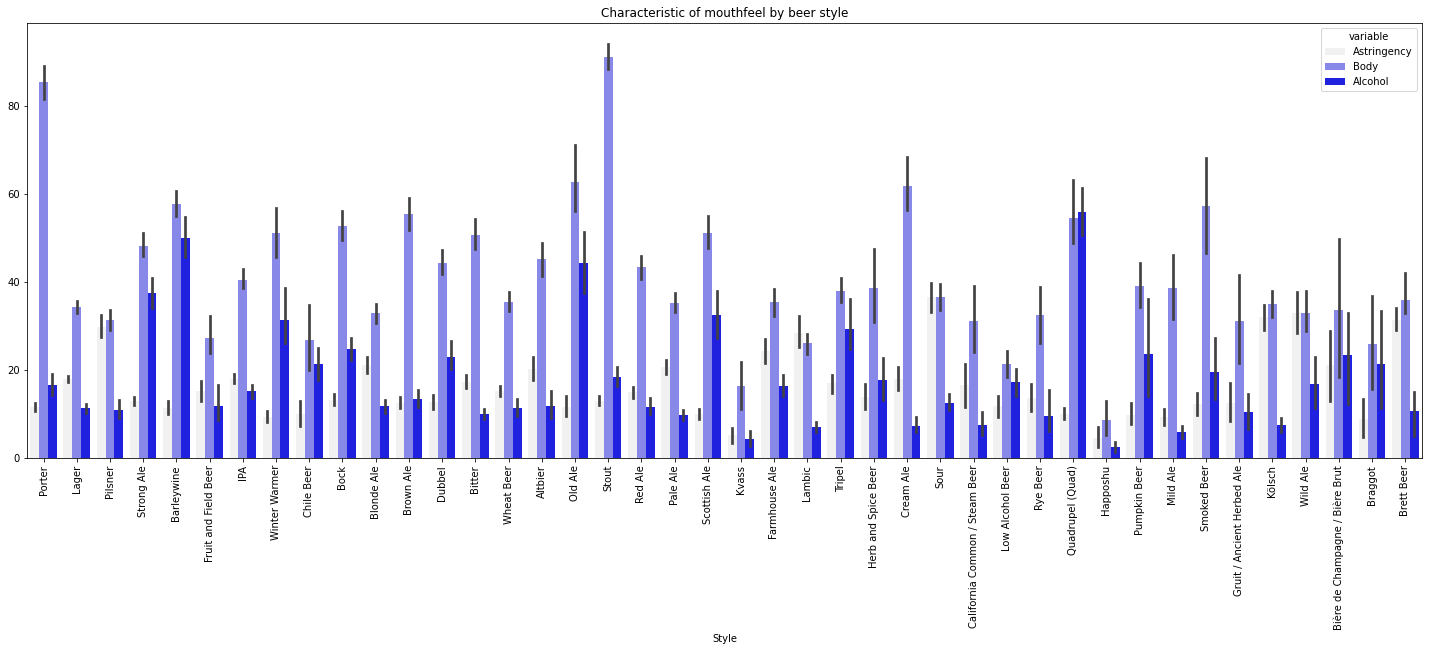

In [51]:
plt.subplots(figsize=(25, 8))


p = sns.barplot(
    data=beer_mouth_style_plot, 
    x='Style_red', 
    y='value', 
    hue='variable', 
    color='blue',
    
)

plt.xlabel('Style') 
plt.ylabel('') 
plt.title('Characteristic of mouthfeel by beer style')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y') 
plt.show() 

In [42]:
beer_taste_style = beer_corr_style.filter(['Bitter', 'Sweet', 'Sour', 'Salty', 'Style_red']).copy()

In [43]:
beer_taste_style_plot = pd.melt(beer_taste_style, id_vars=['Style_red'], value_vars=['Bitter', 'Sweet', 'Sour', 'Salty']).copy()

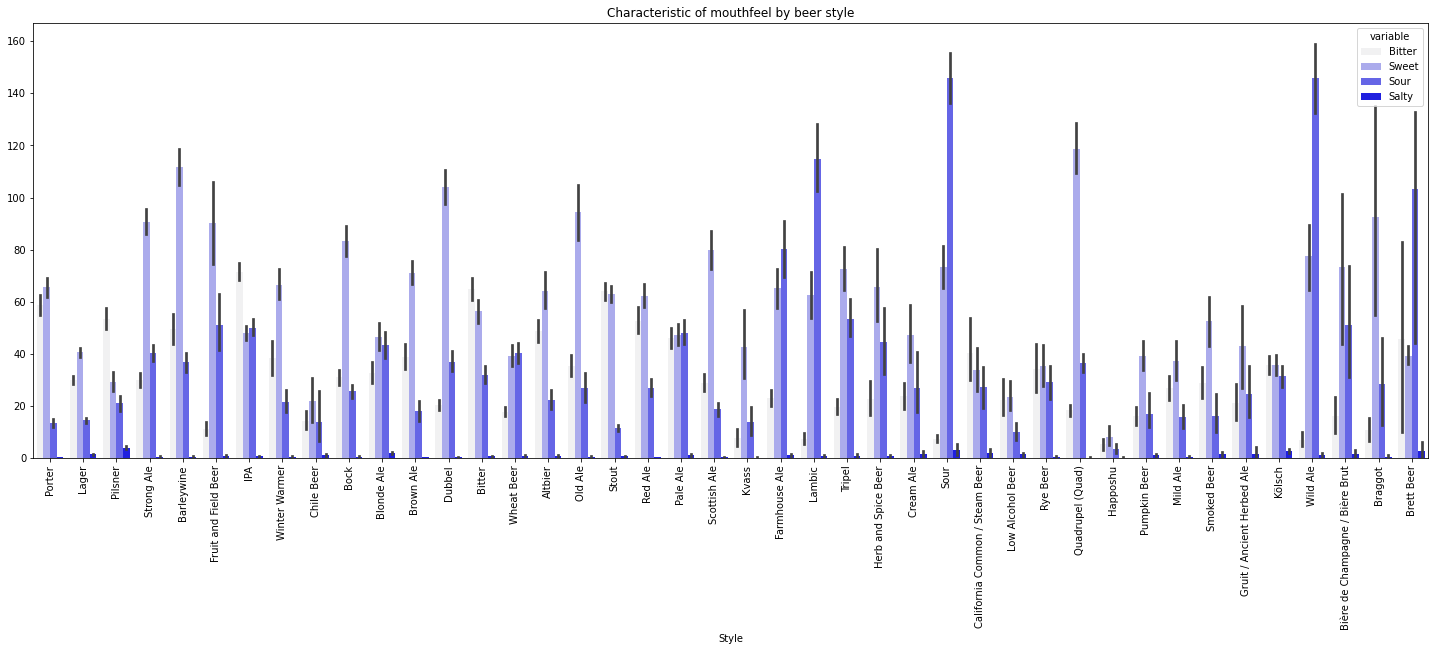

In [52]:
plt.subplots(figsize=(25, 8))


p = sns.barplot(
    data=beer_taste_style_plot, 
    x='Style_red', 
    y='value', 
    hue='variable', 
    color='blue',
    
)

plt.xlabel('Style') 
plt.ylabel('') 
plt.title('Characteristic of mouthfeel by beer style')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y') 
plt.show() 

In [45]:
beer_flavor_style = beer_corr_style.filter(['Fruits', 'Hoppy', 'Spices', 'Malty', 'Style_red']).copy()

In [46]:
beer_flavor_style_plot = pd.melt(beer_flavor_style, id_vars=['Style_red'], value_vars=['Fruits', 'Hoppy', 'Spices', 'Malty']).copy()

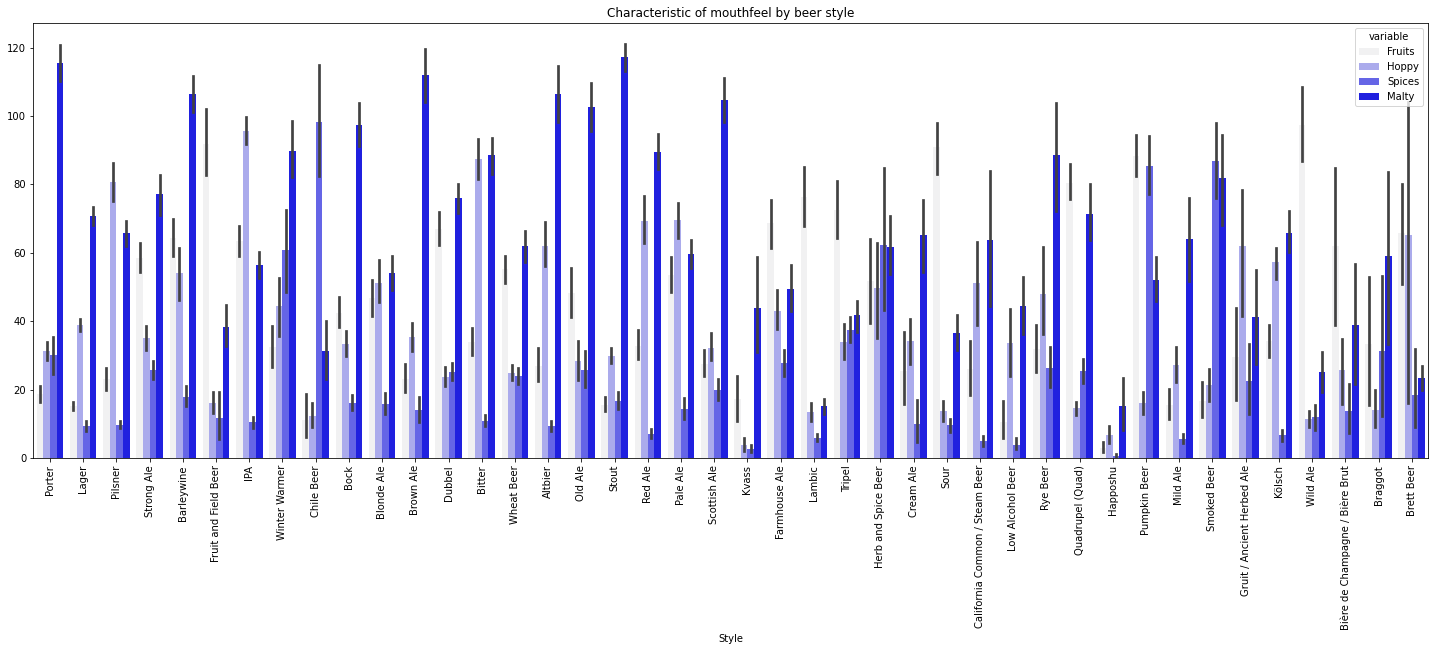

In [53]:
plt.subplots(figsize=(25, 8))


p = sns.barplot(
    data=beer_flavor_style_plot, 
    x='Style_red', 
    y='value', 
    hue='variable', 
    color='blue',
    
)

plt.xlabel('Style') 
plt.ylabel('') 
plt.title('Characteristic of mouthfeel by beer style')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y') 
plt.show() 

### reduce to these styles: Pilsner, Lager, Bock, Stout, Wheat Beer  --- visualization is done in Tableau

In [63]:
beer_mouth_style_red = beer_mouth_style.loc[beer_mouth_style['Style_red'].isin(['Pilsner', 'Lager', 'Bock', 'Stout', 'Wheat Beer'])]

In [69]:
beer_mouth_style_red.to_csv(r'C:\Users\Anja Wittler\OneDrive\Dokumente\TG\WBS\bootcamp\project\data\beer\data\beer_mouth_style.csv')

In [65]:
beer_taste_style_red = beer_taste_style.loc[beer_mouth_style['Style_red'].isin(['Pilsner', 'Lager', 'Bock', 'Stout', 'Wheat Beer'])]

In [70]:
beer_taste_style_red.to_csv(r'C:\Users\Anja Wittler\OneDrive\Dokumente\TG\WBS\bootcamp\project\data\beer\data\beer_taste_style.csv')

In [67]:
beer_flavor_style_red = beer_flavor_style.loc[beer_mouth_style['Style_red'].isin(['Pilsner', 'Lager', 'Bock', 'Stout', 'Wheat Beer'])]

In [71]:
beer_flavor_style_red.to_csv(r'C:\Users\Anja Wittler\OneDrive\Dokumente\TG\WBS\bootcamp\project\data\beer\data\beer_flavor_style.csv')